**AVOCADO PRICES DATA VIZUALIZATION**
---------------------------
This data explores the avocado prices between December 27th, 2015 and January 7th 2018. I had avocado toast this morning for breakfast, and I found this dataset interesting as the person who uploaded it to Kaggle wanted to explore whether the pices of avocados have increased since the popularity of avocado toast. Some questions that I will be addressing in this project is how the avocado prices have changed over time, whehter there has been a significant change in the type of avocado bought, and finally I am going to end with conclusions and findings from the data.   

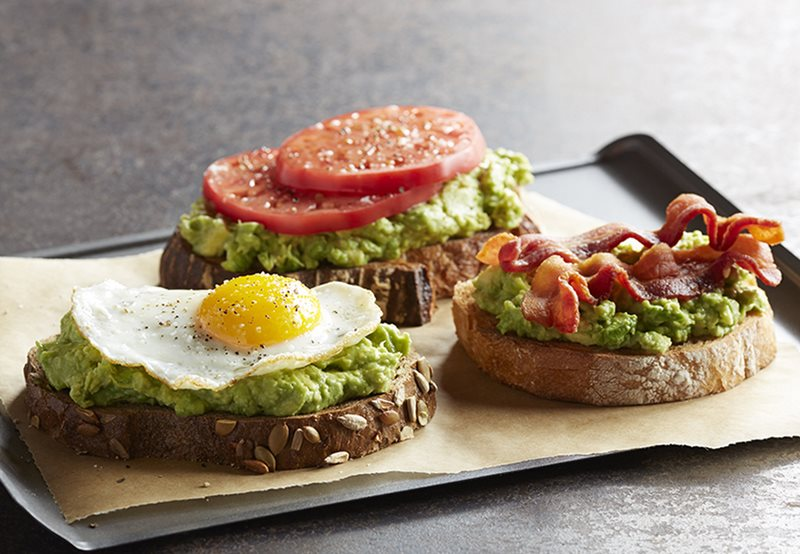

**Image credit: Google Images**

- Original Data Link: https://hassavocadoboard.com/
- I downloaded it from this Kaggle page: https://www.kaggle.com/neuromusic/avocado-prices 


In [1]:
#importing all the packages 
%matplotlib inline

import warnings
warnings.filterwarnings("ignore", message="numpy.dtype size changed")
import plotly.offline as py
import plotly.graph_objs as go
from plotly.offline import init_notebook_mode
init_notebook_mode(connected=True)
from plotly import tools

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.rcParams["figure.figsize"] = (10, 10)
import pandas as pd
from sklearn import datasets

In [3]:
#importing the dataset 
avocado_dataset = pd.read_csv("avocado.csv")

In [4]:
avocado_dataset.head()
#avocado_dataset.tail()


,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany


**Data Dictionary** 
* Date = Date 
* AveragePrice = Average Price 
* Total Volume = Total volume of avocado per day 
* 4046 = Small/medium hass 
* 4225 = Large Hass Avocado
* 4770 = Extra Large Hass Avocado 


In [5]:
#getting a preliminary analysis of the data 
#using pandas profiling 
import pandas_profiling
report = pandas_profiling.ProfileReport(avocado_dataset)

In [6]:
#saving the report on the computer so I can upload it to the repo 
report.to_file(outputfile="avocado_analysis.html")

In [7]:
#copying the dataset so that I don't modify the original 
avocado = avocado_dataset

In [8]:
#dropping columns that won't be used in the analysis 
#for this analysis, I will only be considering the year, average price, total bags, type, and region 
avocado = avocado.drop(columns=["Unnamed: 0", "4046", "4225", "4770", "Small Bags", "XLarge Bags", "Large Bags"])


In [9]:
avocado

,Date,AveragePrice,Total Volume,Total Bags,type,year,region
0,2015-12-27,1.33,64236.62,8696.87,conventional,2015,Albany
1,2015-12-20,1.35,54876.98,9505.56,conventional,2015,Albany
2,2015-12-13,0.93,118220.22,8145.35,conventional,2015,Albany
3,2015-12-06,1.08,78992.15,5811.16,conventional,2015,Albany
4,2015-11-29,1.28,51039.60,6183.95,conventional,2015,Albany
5,2015-11-22,1.26,55979.78,6683.91,conventional,2015,Albany
6,2015-11-15,0.99,83453.76,8318.86,conventional,2015,Albany
7,2015-11-08,0.98,109428.33,6829.22,conventional,2015,Albany
8,2015-11-01,1.02,99811.42,11388.36,conventional,2015,Albany
9,2015-10-25,1.07,74338.76,8625.92,conventional,2015,Albany


Text(0.5, 1.0, 'Histogram of Avocado Average Prices')

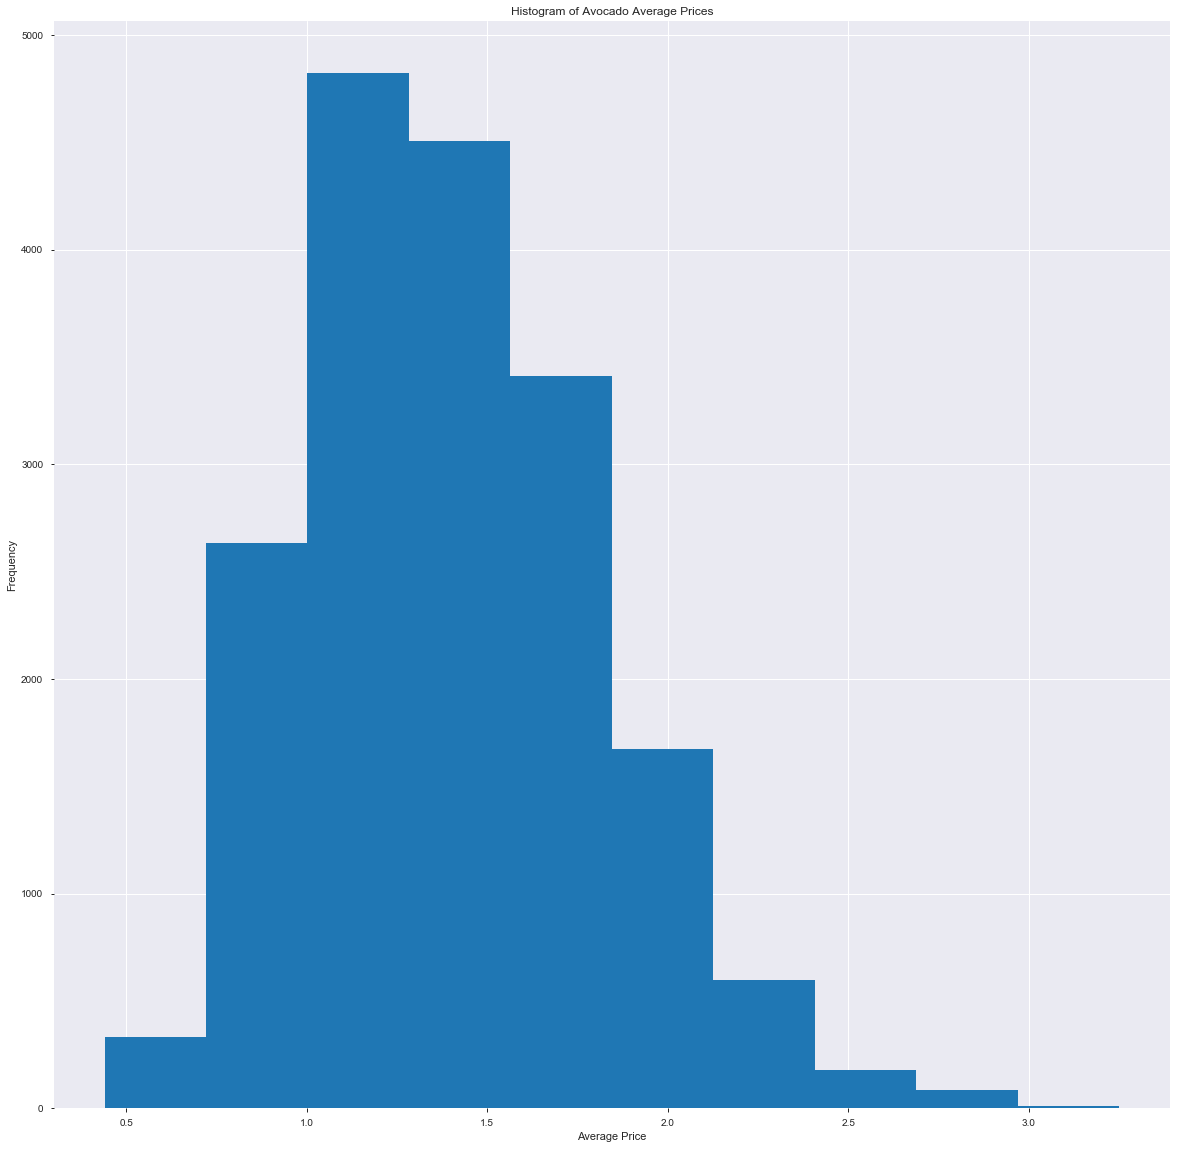

In [10]:
#Distribution of avocado prices over the dataset 

%matplotlib inline
plt.rcParams["figure.figsize"] = (20, 20)
avocado.hist("AveragePrice")
plt.xlabel("Average Price")
plt.ylabel("Frequency")
plt.title("Histogram of Avocado Average Prices")

In [13]:
import numpy as np
np.mean(avocado["AveragePrice"])


1.4059784097758825

In [14]:
np.median(avocado["AveragePrice"])

1.37

The histogram of the Average price shows that the prices are slightly right skewed which tells us that the mean of the avocado prices "$1.4" is greater than the median (1.3). This tells us that the typical avocado has the price of (1.4), however, 50 percent of the time avocados are priced below 1.37. 

In [15]:
avocado_grouped = avocado.groupby('year')['AveragePrice'].mean()
avocado_grouped_date = avocado.groupby('Date')['AveragePrice'].mean()

Text(0.5, 1.0, 'Average Price By Year')

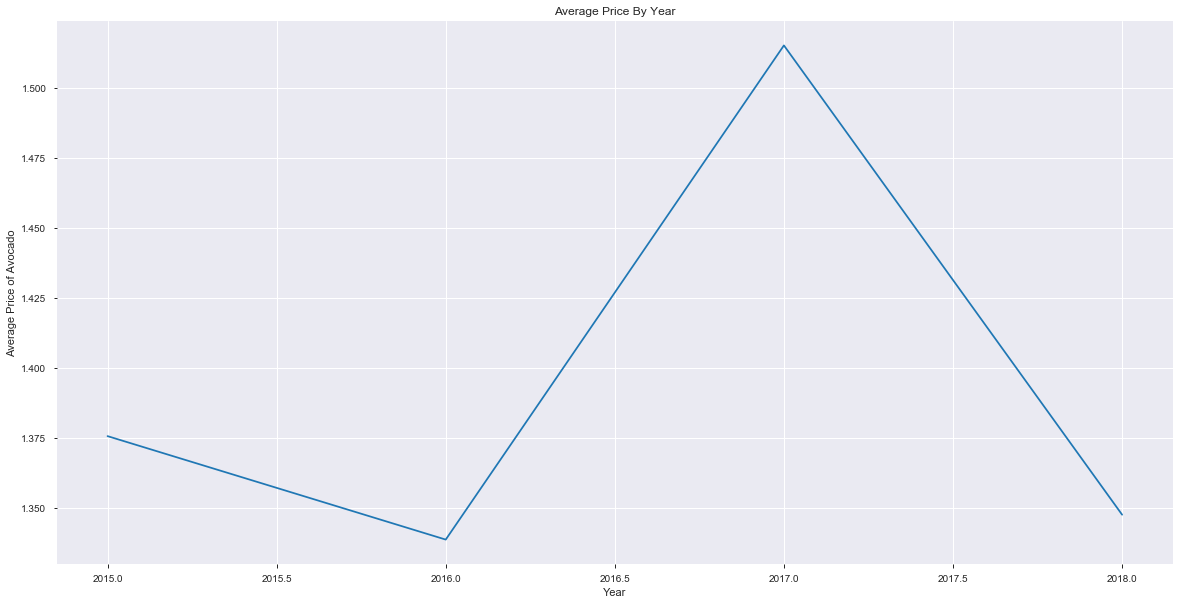

In [16]:
%matplotlib inline
plt.rcParams["figure.figsize"] = (20, 10)
plt.plot(avocado_grouped)
plt.xlabel("Year")
plt.ylabel("Average Price of Avocado")
plt.title("Average Price By Year")

As you can see from the graph, there seems to be a sharp increase in the average avocado price. According to The Telegraph (https://www.telegraph.co.uk/news/2017/05/01/avocado-prices-have-hit-all-time-high/) the avocado prices were so high in 2017 as there was a mismatch between supply and demanand during that time.However, one drawback in this dataset is that it has very little data in year 2015 and in year 2018. Below is a graph that shows the trend of average avocado prices throughout all dates of the dataset. 

In [37]:
avocado_grouped_date.index = pd.to_datetime(avocado_grouped_date.index)

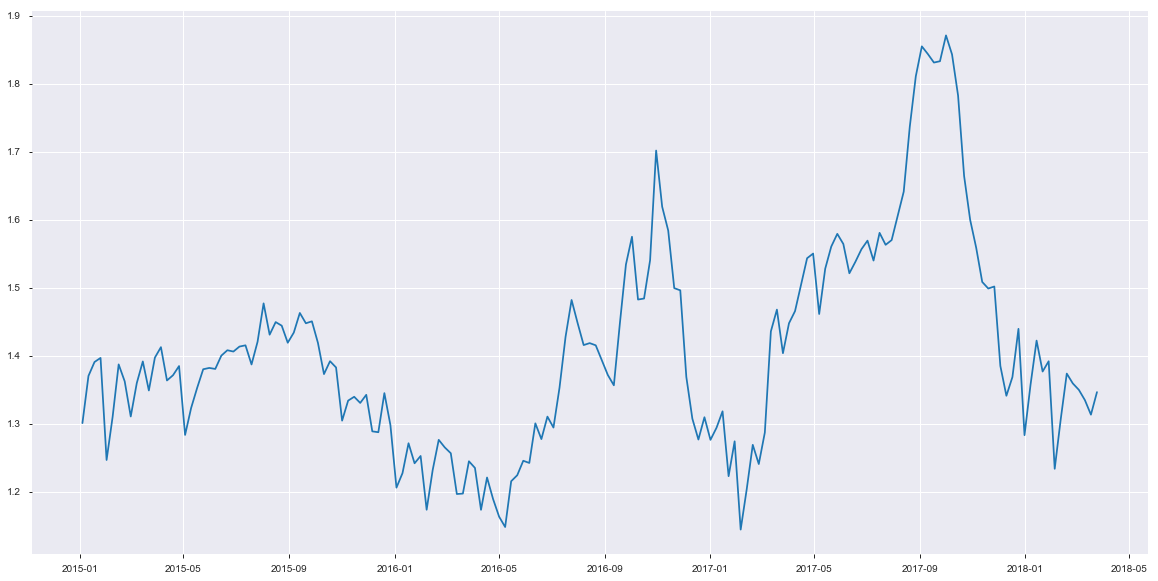

In [38]:
%matplotlib inline
plt.rcParams["figure.figsize"] = (20, 10)
plt.plot(avocado_grouped_date)


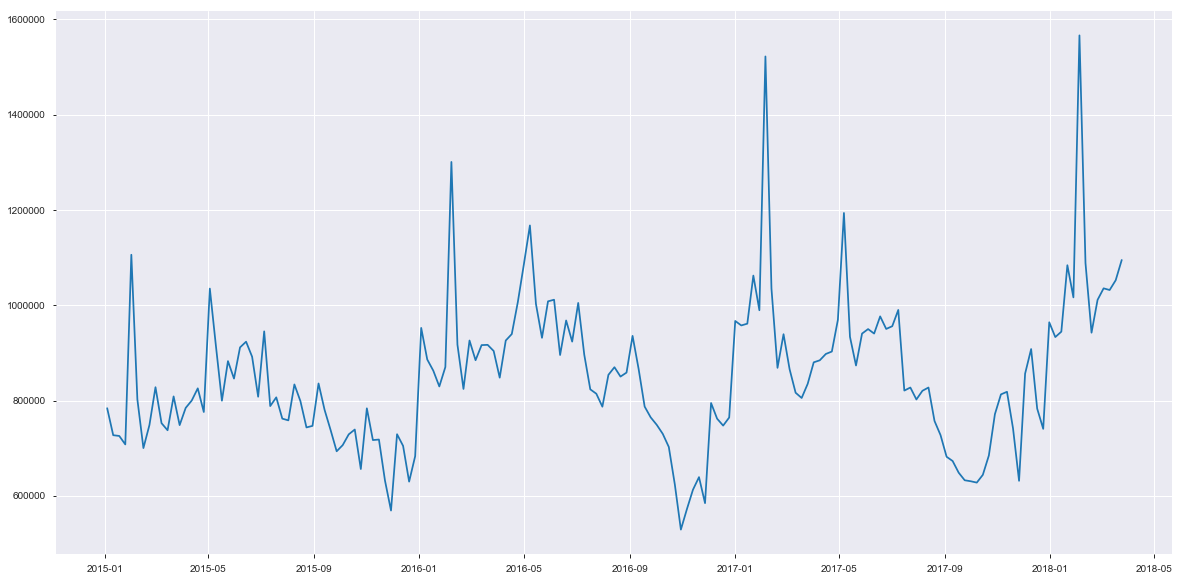

In [21]:
#trend of the volume 
avocado_volume_date = avocado.groupby('Date')['Total Volume'].mean()
avocado_volume_date.index = pd.to_datetime(avocado_volume_date.index)
plt.plot(avocado_volume_date)

Through this graph above, you can see how the volume of avocados being produced over time is trending. The volume of avocados bring produced before each avocado season is increach each year. This shows that avocado based dishes such as avocado toast is growing in popularity. 

The graph above shows the the trend in the average price throughout the dataset. The peak is between May 2017 and September 2017, which is peak avocado season. You can also see the seasonality in the data as most of the pother peaks are also between May and September/October. 


**CONCLUSIONS**
This is a very simple analysis of what is happening to avocado prices with the prices increasing during the avocado season and getting cheaper during off seasons. The gaphs show very good seasonality. Other conclusions are: 
(Based on the report)
* All the different types of avocados are highly correlated with each other. 
* The number of organic and inorganic types are approximatly the same. 

From Data Visualization 
* There is a clear seasonality in the data. 
* Prices are higher when they are in season. 
* Volume of avocados is increasing each year. 

Based on this study, you can see that the pice of avocaodos increase during the season. The volume being produced is also increasing each year. 

So, enjoy a nice avocado toast tomorrow morning :) 
